In [6]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from yahoo_historical import Fetcher
from quant_predict import quant_pred

ticker = 'SHOP'
start = [2019,1,1]

df = Fetcher(ticker, start).getHistorical()	
#df = df[['Date','Close']]
df.Date = pd.to_datetime(df.Date)
df.head()

signals, gl_alg, gl_ref = quant_pred(df, 'macd')

TypeError: quant_pred() takes 1 positional argument but 2 were given

In [2]:
gl_alg

71.4073948418933

In [3]:
gl_ref

66.67965900233827

(195,)
(195,)


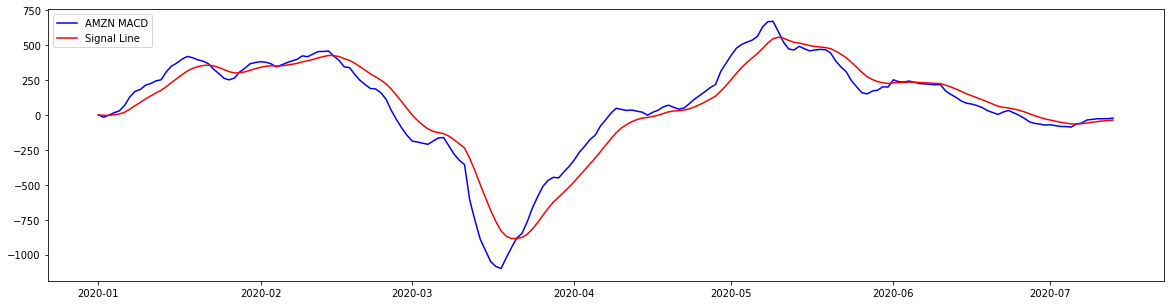

C:\Users\hadit\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


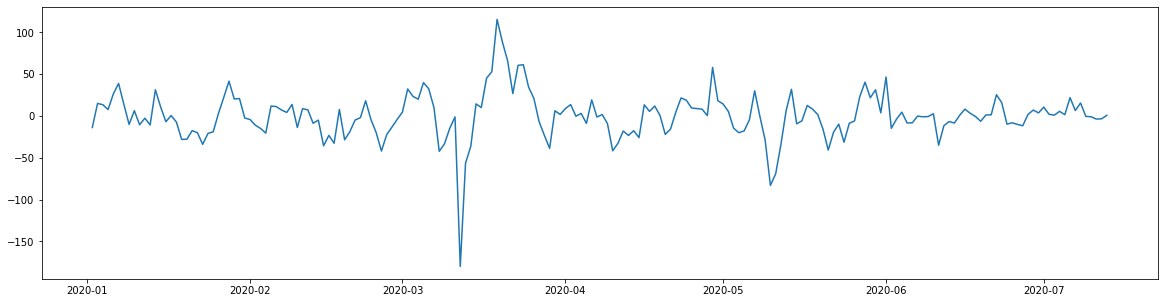

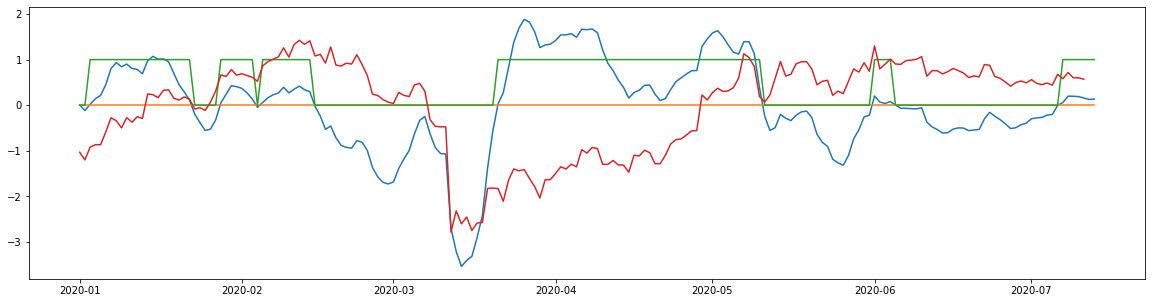

In [4]:
ticker = 'BTC-USD'
start = [2020,1,1]

df = Fetcher(ticker, start).getHistorical()	
#df = df[['Date','Close']]
df.Date = pd.to_datetime(df.Date)
df.head()

signals, gl_alg, gl_ref = quant_pred(df)

In [5]:
signals

,Start,End,len,macd_max,chg_max,chg_pct_max,close_start,close_end,gain_loss
0,2020-01-03,2020-01-22,20.0,117.674999,39.009776,9.750097,7344.884277,8680.875977,18.189418
1,2020-01-28,2020-02-03,7.0,46.474910,41.725409,4.033442,9358.589844,9293.521484,-0.695280
2,2020-02-05,2020-02-14,10.0,45.465498,13.889913,1.916504,9613.423828,10312.116211,7.267883
3,2020-03-21,2020-05-10,51.0,207.272908,66.282843,10.646595,6185.066406,8756.430664,41.573753
4,2020-06-01,2020-06-04,4.0,21.570896,46.738158,1.365126,10167.268555,9800.636719,-3.606001
5,2020-07-07,2020-07-13,7.0,21.228190,15.665799,2.816379,9252.277344,9279.658203,0.295936


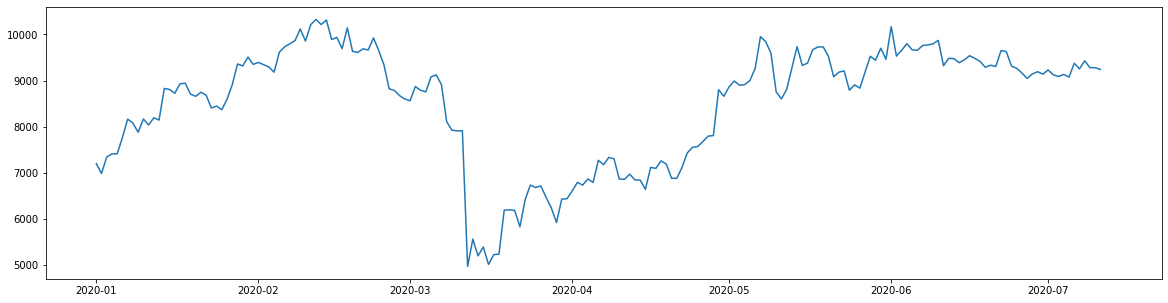

In [6]:
plt.figure(figsize=(20,5))
plt.plot(df.Date, df.Close)